In [1]:
!gdown 1qYV_OJsuHH5ulty80Pq331wfuyEvg9A_

Downloading...
From: https://drive.google.com/uc?id=1qYV_OJsuHH5ulty80Pq331wfuyEvg9A_
To: /content/1491423217564.json
100% 2.41M/2.41M [00:00<00:00, 201MB/s]


In [2]:
import json

# File path
input_file = "/content/1491423217564.json"

# Target session
target_session = "1491423217564_18_/study/benefits_of_running_writing"

# Store extracted typing events
typing_events = []

# Load the whole JSON array at once
with open(input_file, "r", encoding="utf-8") as f:
    data = json.load(f)

# Filter for textInput in the specific session
for entry in data:
    if (
        entry.get("type") == "textInput" and
        "benefits_of_running_writing" in entry.get("sessionId", "")
    ):
        typing_events.append({
            "char": entry["text"][-1] if entry["text"] else "",
            "full_text": entry["text"],
            "x": entry["pos"]["left"],
            "y": entry["pos"]["top"],
            "timestamp": entry["epoch"]
        })

# Output results
for e in typing_events:
    print(e)


{'char': '', 'full_text': '', 'x': 179, 'y': 297, 'timestamp': 1491423860865}
{'char': 'R', 'full_text': 'R', 'x': 190, 'y': 297, 'timestamp': 1491423861104}
{'char': 'u', 'full_text': 'Ru', 'x': 199, 'y': 297, 'timestamp': 1491423861311}
{'char': 'n', 'full_text': 'Run', 'x': 208, 'y': 297, 'timestamp': 1491423861503}
{'char': 'n', 'full_text': 'Runn', 'x': 217, 'y': 297, 'timestamp': 1491423861703}
{'char': 'i', 'full_text': 'Runni', 'x': 220, 'y': 297, 'timestamp': 1491423861879}
{'char': 'n', 'full_text': 'Runnin', 'x': 229, 'y': 297, 'timestamp': 1491423862063}
{'char': 'f', 'full_text': 'Runninf', 'x': 234, 'y': 297, 'timestamp': 1491423862095}
{'char': ' ', 'full_text': 'Runninf ', 'x': 238, 'y': 297, 'timestamp': 1491423862320}
{'char': 'i', 'full_text': 'Runninf i', 'x': 242, 'y': 297, 'timestamp': 1491423862551}
{'char': 'n', 'full_text': 'Runnin', 'x': 229, 'y': 297, 'timestamp': 1491423864471}
{'char': 'g', 'full_text': 'Running', 'x': 238, 'y': 297, 'timestamp': 1491423864

In [3]:
!gdown 1livj2QN14pDy2WDkjcrIkrTrPZZXhnZx

Downloading...
From (original): https://drive.google.com/uc?id=1livj2QN14pDy2WDkjcrIkrTrPZZXhnZx
From (redirected): https://drive.google.com/uc?id=1livj2QN14pDy2WDkjcrIkrTrPZZXhnZx&confirm=t&uuid=6c5cd80d-6996-4bcd-b656-69a2c0d51e87
To: /content/P_01.txt
100% 132M/132M [00:00<00:00, 145MB/s]


In [4]:
import json
import pandas as pd

# Load typing timestamps and get range
typing_df = pd.DataFrame(typing_events)
typing_df['timestamp'] = pd.to_datetime(typing_df['timestamp'], unit='ms')

start_time = int(typing_df['timestamp'].min().timestamp() * 1000) - 200  # add margin
end_time = int(typing_df['timestamp'].max().timestamp() * 1000) + 200

# Load and filter gaze data
gaze_file = "/content/P_01.txt"
gaze_matches = []

with open(gaze_file, "r", encoding="utf-8") as f:
    for line in f:
        try:
            entry = json.loads(line)
            ts_ms = int(entry.get("true_time", 0) * 1000)

            # Basic validation
            x, y = entry["right_gaze_point_on_display_area"]
            if not (0 <= x <= 1) or not (0 <= y <= 1):
                continue  # skip invalid points

            if start_time <= ts_ms <= end_time:
                gaze_matches.append({
                    "timestamp": ts_ms,
                    "x_norm": x,
                    "y_norm": y
                })
        except (json.JSONDecodeError, KeyError, TypeError):
            continue

# Optional sanity check
print(f"Extracted {len(gaze_matches)} gaze points.")
print("Example:", gaze_matches[:3])


Extracted 8010 gaze points.
Example: [{'timestamp': 1491423860975, 'x_norm': 0.42252522706985474, 'y_norm': 0.7482141256332397}, {'timestamp': 1491423861017, 'x_norm': 0.40875038504600525, 'y_norm': 0.7378613352775574}, {'timestamp': 1491423861025, 'x_norm': 0.26750680804252625, 'y_norm': 0.6483697295188904}]


Correlation after interpolation (X): 0.7846389496103476
Correlation after interpolation (Y): nan


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


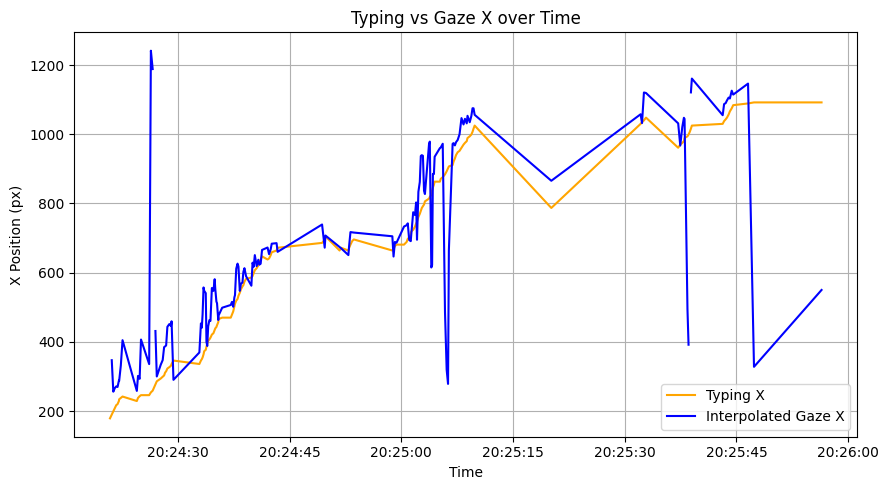

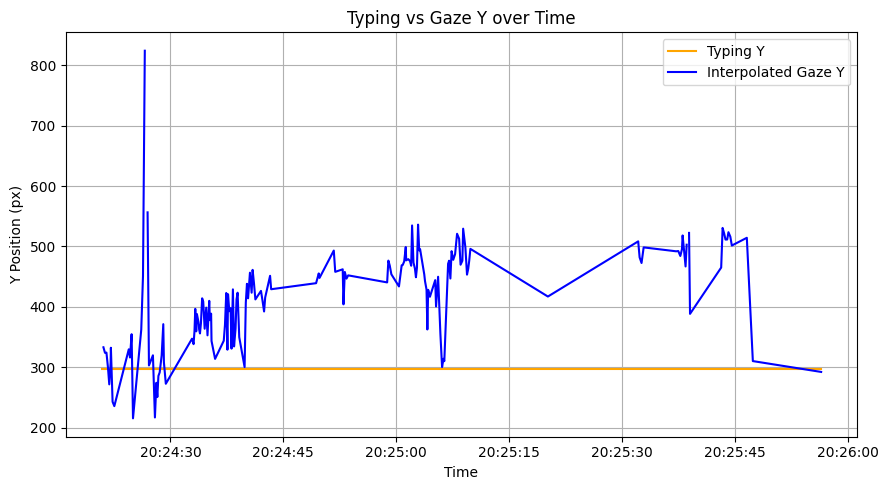

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Config
screen_width = 1440
screen_height = 900

#Typing Data
typing_df = pd.DataFrame(typing_events)
typing_df['timestamp'] = pd.to_datetime(typing_df['timestamp'], unit='ms')

#Gaze Data
gaze_df = pd.DataFrame(gaze_matches)
gaze_df['x_px'] = gaze_df['x_norm'] * screen_width
gaze_df['y_px'] = gaze_df['y_norm'] * screen_height
gaze_df['timestamp'] = pd.to_datetime(gaze_df['timestamp'], unit='ms')

#Interpolation
gaze_df.set_index('timestamp', inplace=True)
gaze_df = gaze_df[~gaze_df.index.duplicated(keep='first')]
interp_gaze = gaze_df[['x_px', 'y_px']].sort_index().interpolate(method='time')

#Align gaze with typing timestamps
aligned_gaze = interp_gaze.reindex(typing_df['timestamp'], method='nearest', tolerance=pd.Timedelta(milliseconds=50))
typing_df['gaze_x_px'] = aligned_gaze['x_px'].values
typing_df['gaze_y_px'] = aligned_gaze['y_px'].values

#Compute distance
typing_df['gaze_distance'] = np.sqrt(
    (typing_df['x'] - typing_df['gaze_x_px'])**2 +
    (typing_df['y'] - typing_df['gaze_y_px'])**2
)

#Correlation
x_corr = typing_df['x'].corr(typing_df['gaze_x_px'])
y_corr = typing_df['y'].corr(typing_df['gaze_y_px'])
print("Correlation after interpolation (X):", x_corr)
print("Correlation after interpolation (Y):", y_corr)

#Plot X
plt.figure(figsize=(9, 5))
plt.plot(typing_df['timestamp'], typing_df['x'], label='Typing X', color='orange')
plt.plot(typing_df['timestamp'], typing_df['gaze_x_px'], label='Interpolated Gaze X', color='blue')
plt.xlabel("Time")
plt.ylabel("X Position (px)")
plt.title("Typing vs Gaze X over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Plot Y
plt.figure(figsize=(9, 5))
plt.plot(typing_df['timestamp'], typing_df['y'], label='Typing Y', color='orange')
plt.plot(typing_df['timestamp'], typing_df['gaze_y_px'], label='Interpolated Gaze Y', color='blue')
plt.xlabel("Time")
plt.ylabel("Y Position (px)")
plt.title("Typing vs Gaze Y over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
print("🧪 Missing values in typing_df['y']:", typing_df['y'].isnull().sum())
print("🧪 Missing values in gaze_y_px:", typing_df['gaze_y_px'].isnull().sum())
print("🧪 Unique values in typing Y:", typing_df['y'].nunique())
print("🧪 Unique values in gaze Y:", typing_df['gaze_y_px'].nunique())


🧪 Missing values in typing_df['y']: 0
🧪 Missing values in gaze_y_px: 3
🧪 Unique values in typing Y: 1
🧪 Unique values in gaze Y: 164


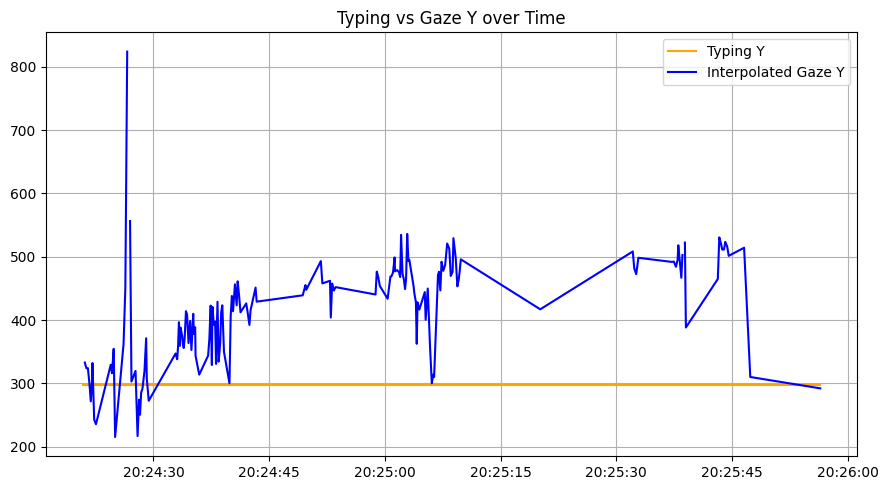

In [7]:
plt.figure(figsize=(9, 5))
plt.plot(typing_df['timestamp'], typing_df['y'], label='Typing Y', color='orange')
plt.plot(typing_df['timestamp'], typing_df['gaze_y_px'], label='Interpolated Gaze Y', color='blue')
plt.title("Typing vs Gaze Y over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [51]:
def detect_fixations(gaze_df, std_threshold=35, window_duration=300):
    """
    Detect fixations in gaze data using a sliding window approach.

    Parameters:
    - gaze_df: DataFrame with ['timestamp', 'x_px', 'y_px'] in pixel space.
    - std_threshold: Max std deviation (in px) to be considered a fixation.
    - window_duration: Sliding window in milliseconds.

    Returns:
    - fixations_df: DataFrame with ['start_time', 'end_time', 'duration', 'mean_x', 'mean_y']
    """
    fixations = []
    gaze_df = gaze_df.reset_index().sort_values("timestamp")  # ensure timestamp is a column

    start_idx = 0
    while start_idx < len(gaze_df):
        start_time = gaze_df.loc[start_idx, 'timestamp']
        end_time = start_time + pd.Timedelta(milliseconds=window_duration)
        window = gaze_df[(gaze_df['timestamp'] >= start_time) & (gaze_df['timestamp'] <= end_time)]

        if len(window) < 5:
            start_idx += 1
            continue

        std_x = window['x_px'].std()
        std_y = window['y_px'].std()

        if std_x < std_threshold and std_y < std_threshold:
            fixation = {
                'start_time': window.iloc[0]['timestamp'],
                'end_time': window.iloc[-1]['timestamp'],
                'duration': (window.iloc[-1]['timestamp'] - window.iloc[0]['timestamp']).total_seconds() * 1000,
                'mean_x': window['x_px'].mean(),
                'mean_y': window['y_px'].mean()
            }
            fixations.append(fixation)

            # Move index to first point after fixation
            start_idx = gaze_df[gaze_df['timestamp'] > fixation['end_time']].index.min()
            if pd.isna(start_idx):
                break
        else:
            start_idx += 1

    return pd.DataFrame(fixations)


In [52]:
fixations_df = detect_fixations(gaze_df)
print("Detected", len(fixations_df), "fixations")
fixations_df.head()


Detected 203 fixations


,start_time,end_time,duration,mean_x,mean_y
0,2017-04-05 20:24:21.125,2017-04-05 20:24:21.425,300.0,273.088844,340.215935
1,2017-04-05 20:24:21.433,2017-04-05 20:24:21.725,292.0,271.979279,335.254243
2,2017-04-05 20:24:22.008,2017-04-05 20:24:22.308,300.0,312.715815,286.447282
3,2017-04-05 20:24:22.683,2017-04-05 20:24:22.983,300.0,266.598721,353.771000
4,2017-04-05 20:24:22.992,2017-04-05 20:24:23.292,300.0,263.400151,356.639069


In [53]:
def align_fixations_to_typing(typing_df, fixations_df):
    """
    For each typing event, find the most recent fixation before the keypress.

    Adds 3 columns to typing_df:
    - fixation_end_time
    - fixation_lag_ms
    - fixation_distance

    Returns:
    - updated typing_df with fixation info
    """
    fixation_end_times = []
    fixation_lags = []
    fixation_distances = []

    for _, row in typing_df.iterrows():
        keypress_time = row['timestamp']

        # Find the last fixation ending before the keypress
        previous_fixations = fixations_df[fixations_df['end_time'] < keypress_time]

        if not previous_fixations.empty:
            last_fix = previous_fixations.iloc[-1]

            fixation_end_times.append(last_fix['end_time'])
            lag_ms = (keypress_time - last_fix['end_time']).total_seconds() * 1000
            fixation_lags.append(lag_ms)

            # Compute spatial distance from fixation to key
            dist = np.sqrt((row['x'] - last_fix['mean_x'])**2 + (row['y'] - last_fix['mean_y'])**2)
            fixation_distances.append(dist)
        else:
            fixation_end_times.append(None)
            fixation_lags.append(None)
            fixation_distances.append(None)

    typing_df['fixation_end_time'] = fixation_end_times
    typing_df['fixation_lag_ms'] = fixation_lags
    typing_df['fixation_distance'] = fixation_distances

    return typing_df


In [54]:
typing_df = align_fixations_to_typing(typing_df, fixations_df)

# Check output
typing_df[['char', 'timestamp', 'fixation_end_time', 'fixation_lag_ms', 'fixation_distance']].head()


,char,timestamp,fixation_end_time,fixation_lag_ms,fixation_distance
0,,2017-04-05 20:24:20.865,NaT,NaN,NaN
1,R,2017-04-05 20:24:21.104,NaT,NaN,NaN
2,u,2017-04-05 20:24:21.311,NaT,NaN,NaN
3,n,2017-04-05 20:24:21.503,2017-04-05 20:24:21.425,78.0,78.129217
4,n,2017-04-05 20:24:21.703,2017-04-05 20:24:21.425,278.0,70.806606


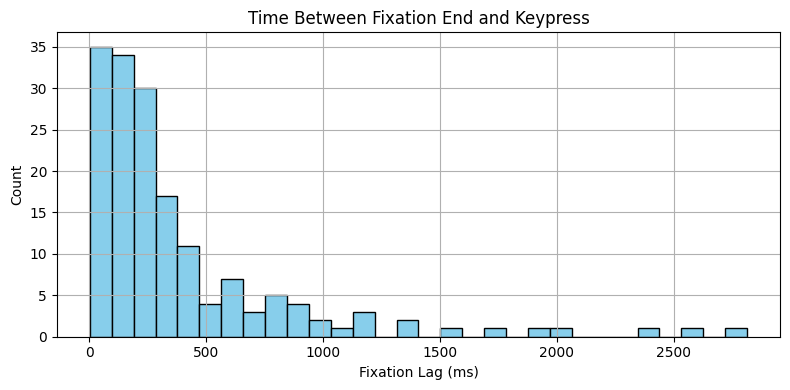

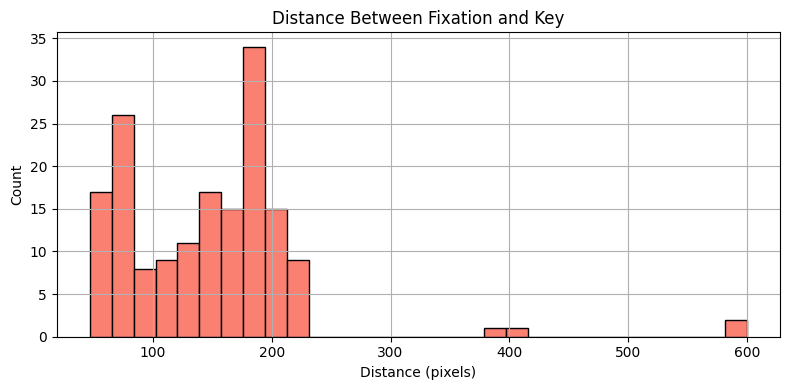

In [55]:
import matplotlib.pyplot as plt

# Drop NaNs
valid_fix = typing_df.dropna(subset=['fixation_lag_ms', 'fixation_distance'])

# Histogram of fixation lag
plt.figure(figsize=(8, 4))
plt.hist(valid_fix['fixation_lag_ms'], bins=30, color='skyblue', edgecolor='black')
plt.title("Time Between Fixation End and Keypress")
plt.xlabel("Fixation Lag (ms)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# Histogram of spatial offset
plt.figure(figsize=(8, 4))
plt.hist(valid_fix['fixation_distance'], bins=30, color='salmon', edgecolor='black')
plt.title("Distance Between Fixation and Key")
plt.xlabel("Distance (pixels)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


In [56]:
print("Avg fixation lag (ms):", round(valid_fix['fixation_lag_ms'].mean(), 2))
print("Avg fixation distance (px):", round(valid_fix['fixation_distance'].mean(), 2))


Avg fixation lag (ms): 385.34
Avg fixation distance (px): 147.75


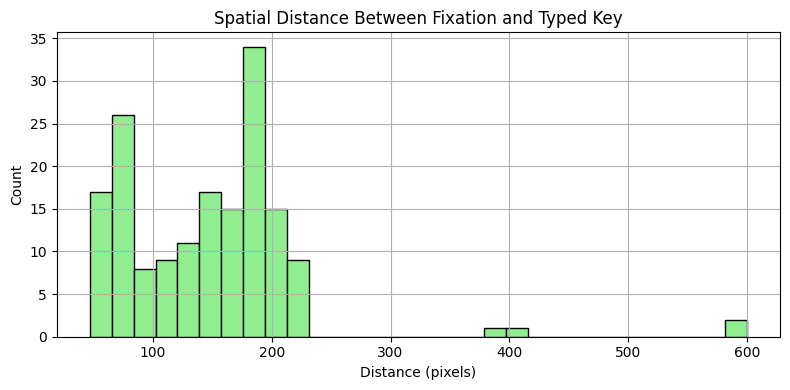

In [57]:
plt.figure(figsize=(8, 4))
plt.hist(valid_fix['fixation_distance'], bins=30, color='lightgreen', edgecolor='black')
plt.title("Spatial Distance Between Fixation and Typed Key")
plt.xlabel("Distance (pixels)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


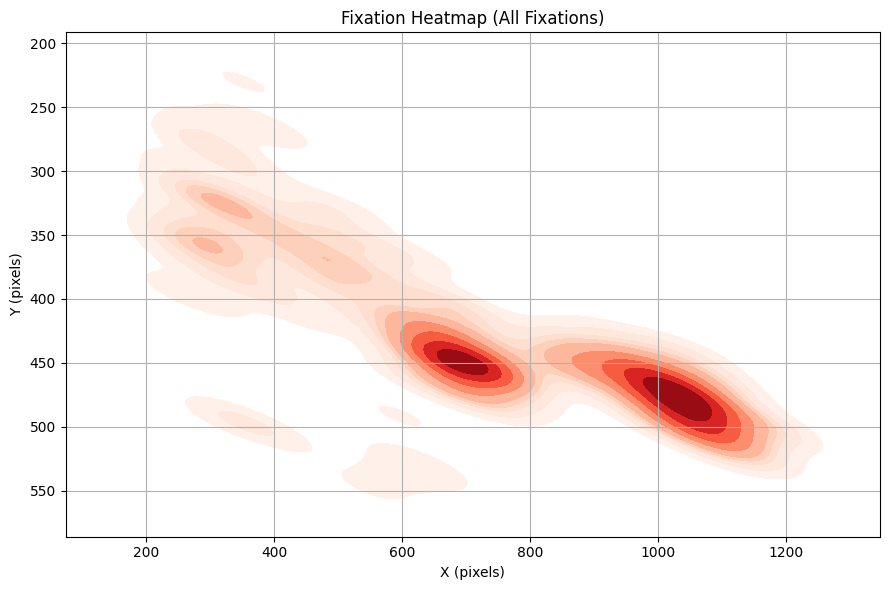

In [58]:
import seaborn as sns

plt.figure(figsize=(9, 6))
sns.kdeplot(
    x=fixations_df['mean_x'],
    y=fixations_df['mean_y'],

    cmap="Reds",
    fill=True,
    bw_adjust=0.5
)
plt.gca().invert_yaxis()
plt.title("Fixation Heatmap (All Fixations)")
plt.xlabel("X (pixels)")
plt.ylabel("Y (pixels)")
plt.grid(True)
plt.tight_layout()
plt.show()


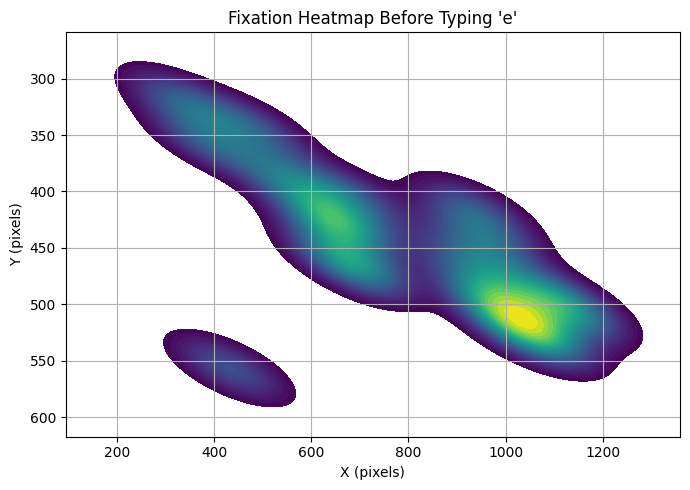

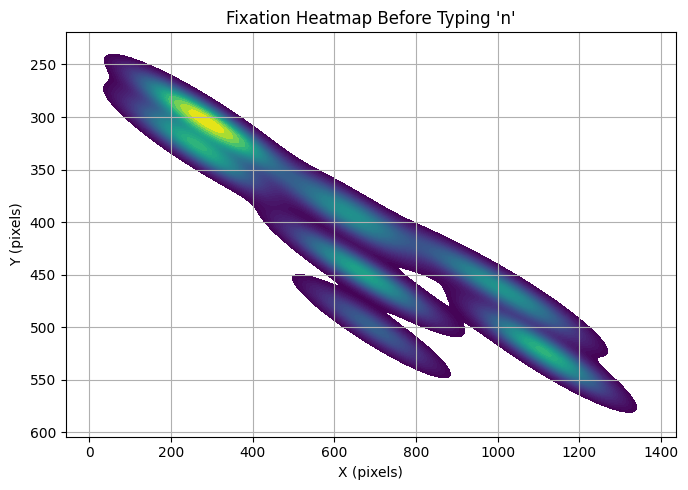

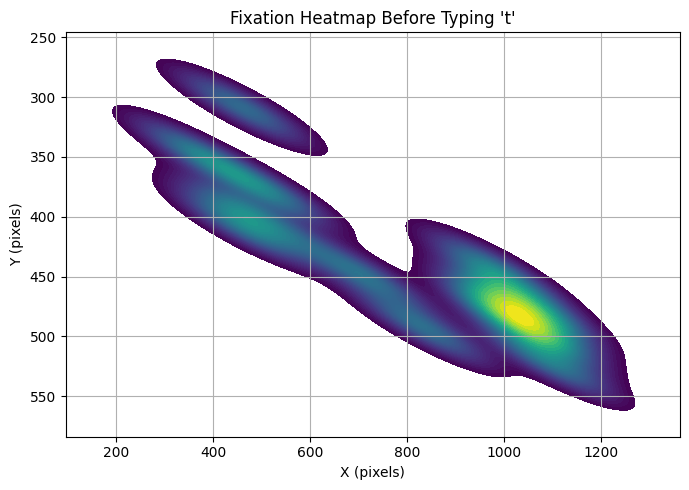

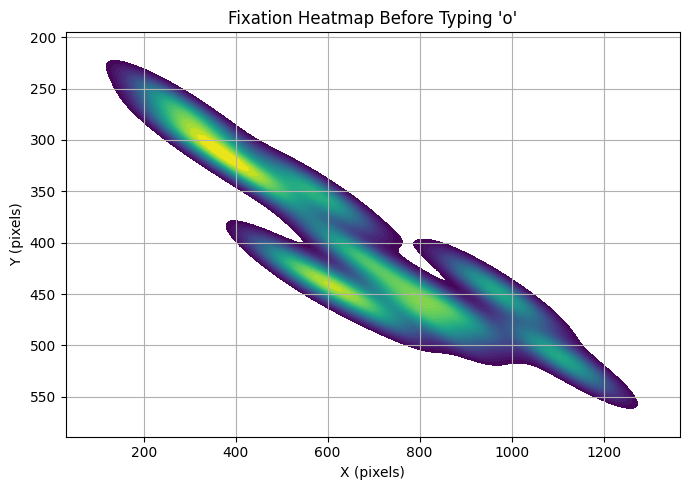

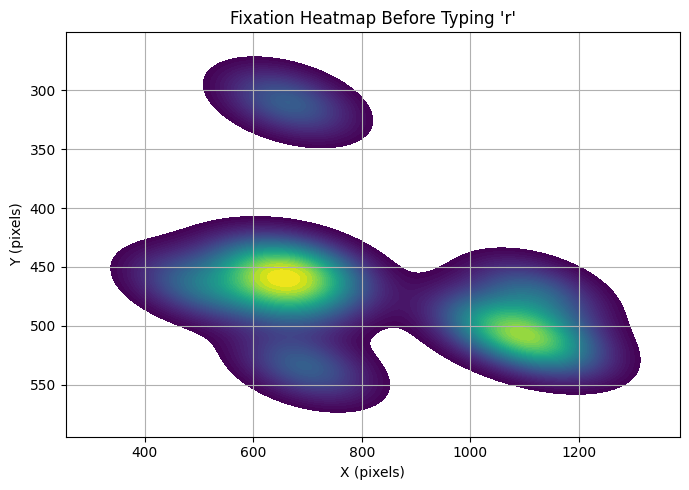

In [59]:
from collections import Counter

# Choose top N frequent characters
top_chars = Counter(valid_fix['char']).most_common(6)
top_chars = [c[0] for c in top_chars if c[0].strip() != '']  # exclude blanks

for ch in top_chars:
    subset = valid_fix[valid_fix['char'] == ch]

    plt.figure(figsize=(7, 5))
    sns.kdeplot(
        x=subset['gaze_x_px'],
        y=subset['gaze_y_px'],
        cmap="viridis",
        fill=True,
        bw_adjust=0.5,
        levels=50
    )
    plt.gca().invert_yaxis()
    plt.title(f"Fixation Heatmap Before Typing '{ch}'")
    plt.xlabel("X (pixels)")
    plt.ylabel("Y (pixels)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


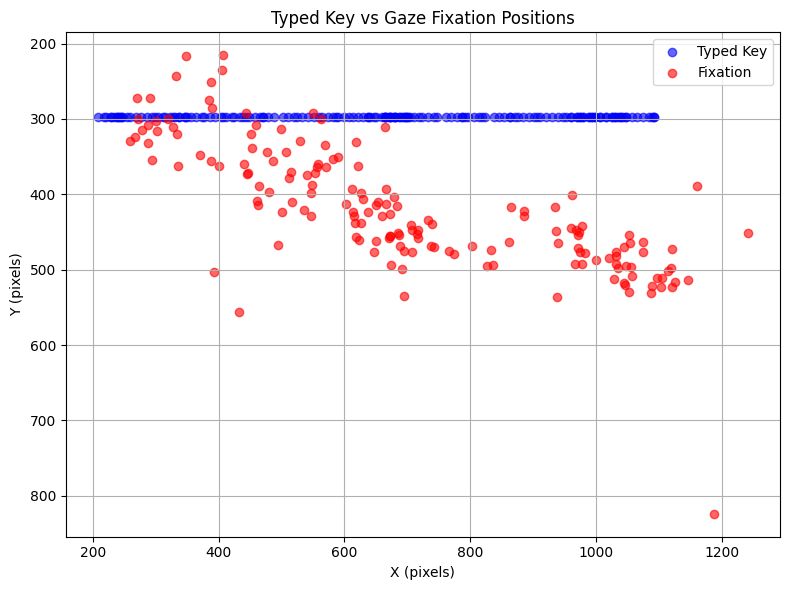

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(valid_fix['x'], valid_fix['y'], label='Typed Key', alpha=0.6, color='blue')
plt.scatter(valid_fix['gaze_x_px'], valid_fix['gaze_y_px'], label='Fixation', alpha=0.6, color='red')
plt.gca().invert_yaxis()
plt.xlabel("X (pixels)")
plt.ylabel("Y (pixels)")
plt.title("Typed Key vs Gaze Fixation Positions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-61-2041963426.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=per_key_stats.reset_index(), x='char', y='fixation_lag_ms', palette='Blues_r')


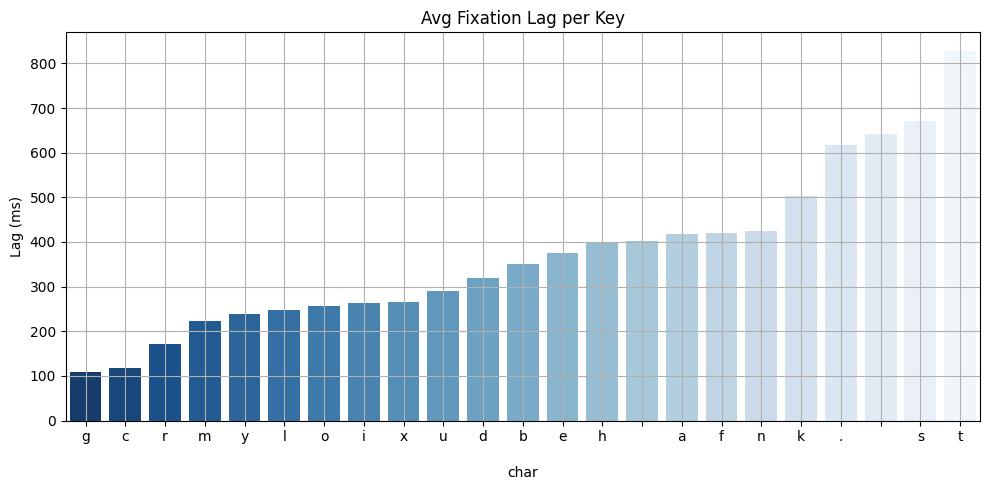

/tmp/ipython-input-61-2041963426.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=per_key_stats.reset_index(), x='char', y='fixation_distance', palette='Reds_r')


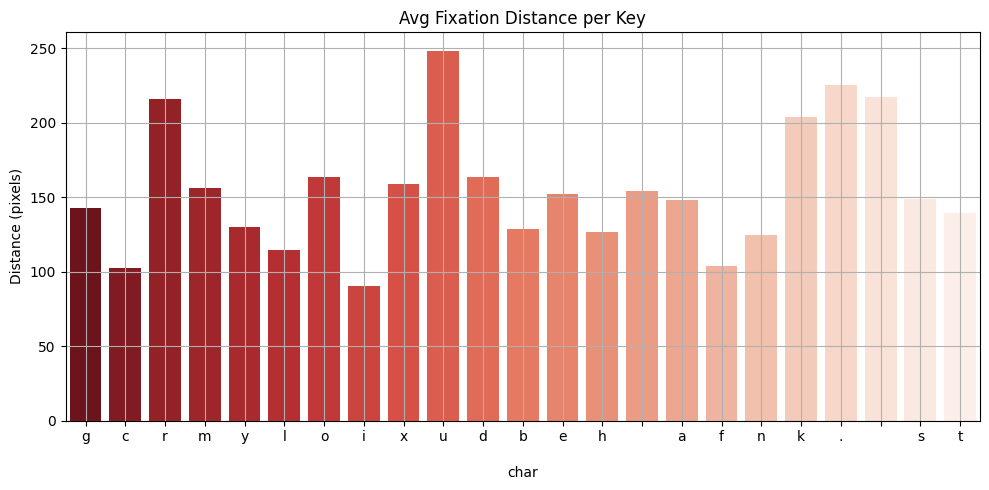

In [61]:
# Group by character
per_key_stats = valid_fix.groupby('char')[['fixation_lag_ms', 'fixation_distance']].mean().sort_values(by='fixation_lag_ms')

import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(data=per_key_stats.reset_index(), x='char', y='fixation_lag_ms', palette='Blues_r')
plt.title("Avg Fixation Lag per Key")
plt.ylabel("Lag (ms)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=per_key_stats.reset_index(), x='char', y='fixation_distance', palette='Reds_r')
plt.title("Avg Fixation Distance per Key")
plt.ylabel("Distance (pixels)")
plt.grid(True)
plt.tight_layout()
plt.show()


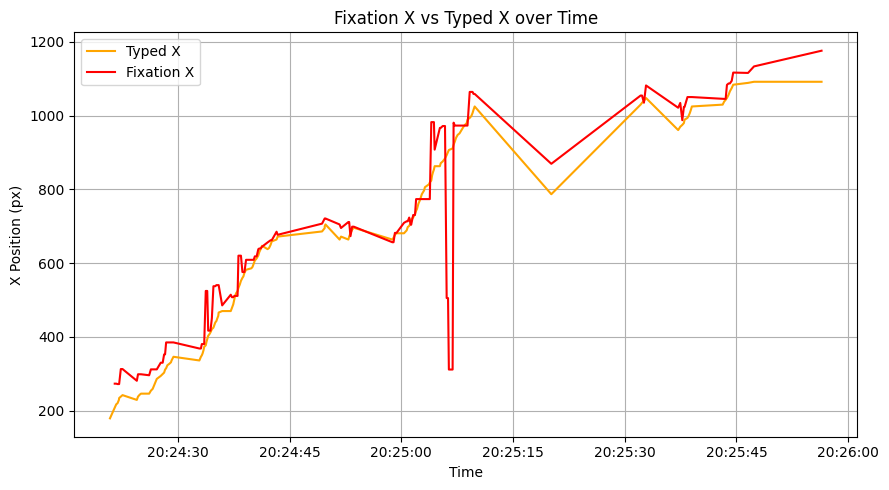

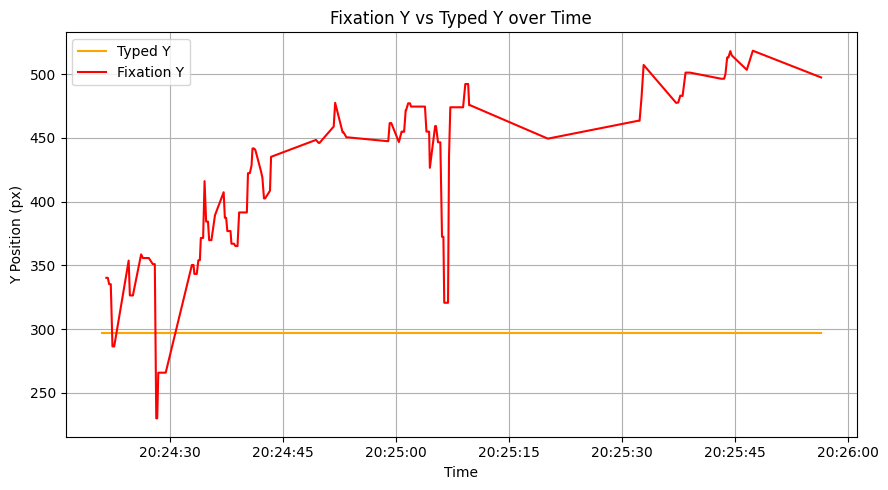

In [62]:
import matplotlib.pyplot as plt

# Ensure fixations and typing timestamps are datetime
fixations_df = fixations_df.sort_values("end_time")
typing_df = typing_df.sort_values("timestamp")

# Plot X over time
plt.figure(figsize=(9, 5))
plt.plot(typing_df['timestamp'], typing_df['x'], label='Typed X', color='orange')
plt.plot(typing_df['timestamp'], typing_df['fixation_end_time'].map(
    dict(zip(fixations_df['end_time'], fixations_df['mean_x']))
), label='Fixation X', color='red')
plt.xlabel("Time")
plt.ylabel("X Position (px)")
plt.title("Fixation X vs Typed X over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Y over time
plt.figure(figsize=(9, 5))
plt.plot(typing_df['timestamp'], typing_df['y'], label='Typed Y', color='orange')
plt.plot(typing_df['timestamp'], typing_df['fixation_end_time'].map(
    dict(zip(fixations_df['end_time'], fixations_df['mean_y']))
), label='Fixation Y', color='red')
plt.xlabel("Time")
plt.ylabel("Y Position (px)")
plt.title("Fixation Y vs Typed Y over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [63]:
# Drop rows without matched fixations
fixation_char_pairs = typing_df.dropna(subset=['fixation_end_time'])

# Format result
fixation_char_list = fixation_char_pairs[[
    'char',
    'timestamp',
    'fixation_end_time',
    'fixation_lag_ms',
    'fixation_distance',
]]

# Add optional fixation details
fixation_char_list['fixation_start_time'] = fixation_char_list['fixation_end_time'].map(
    dict(zip(fixations_df['end_time'], fixations_df['start_time']))
)
fixation_char_list['fixation_mean_x'] = fixation_char_list['fixation_end_time'].map(
    dict(zip(fixations_df['end_time'], fixations_df['mean_x']))
)
fixation_char_list['fixation_mean_y'] = fixation_char_list['fixation_end_time'].map(
    dict(zip(fixations_df['end_time'], fixations_df['mean_y']))
)

# Reorder columns
fixation_char_list = fixation_char_list[[
    'char', 'timestamp', 'fixation_start_time', 'fixation_end_time',
    'fixation_lag_ms', 'fixation_distance', 'fixation_mean_x', 'fixation_mean_y'
]]

# View first rows
fixation_char_list.head(10)


/tmp/ipython-input-63-990795455.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixation_char_list['fixation_start_time'] = fixation_char_list['fixation_end_time'].map(
/tmp/ipython-input-63-990795455.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixation_char_list['fixation_mean_x'] = fixation_char_list['fixation_end_time'].map(
/tmp/ipython-input-63-990795455.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,char,timestamp,fixation_start_time,fixation_end_time,fixation_lag_ms,fixation_distance,fixation_mean_x,fixation_mean_y
3,n,2017-04-05 20:24:21.503,2017-04-05 20:24:21.125,2017-04-05 20:24:21.425,78.0,78.129217,273.088844,340.215935
4,n,2017-04-05 20:24:21.703,2017-04-05 20:24:21.125,2017-04-05 20:24:21.425,278.0,70.806606,273.088844,340.215935
5,i,2017-04-05 20:24:21.879,2017-04-05 20:24:21.433,2017-04-05 20:24:21.725,154.0,64.538613,271.979279,335.254243
6,n,2017-04-05 20:24:22.063,2017-04-05 20:24:21.433,2017-04-05 20:24:21.725,338.0,57.537862,271.979279,335.254243
7,f,2017-04-05 20:24:22.095,2017-04-05 20:24:21.433,2017-04-05 20:24:21.725,370.0,53.905591,271.979279,335.254243
8,,2017-04-05 20:24:22.320,2017-04-05 20:24:22.008,2017-04-05 20:24:22.308,12.0,75.457358,312.715815,286.447282
9,i,2017-04-05 20:24:22.551,2017-04-05 20:24:22.008,2017-04-05 20:24:22.308,243.0,71.498856,312.715815,286.447282
10,n,2017-04-05 20:24:24.471,2017-04-05 20:24:23.300,2017-04-05 20:24:23.600,871.0,76.900563,280.920736,353.726835
11,g,2017-04-05 20:24:24.631,2017-04-05 20:24:24.315,2017-04-05 20:24:24.608,23.0,67.317610,298.550820,326.415282
12,,2017-04-05 20:24:24.847,2017-04-05 20:24:24.315,2017-04-05 20:24:24.608,239.0,62.858193,298.550820,326.415282


In [64]:
from scipy.stats import pearsonr

# Step 1: Align fixation X and Y to typing timestamps
fixation_x_aligned = typing_df['fixation_end_time'].map(
    dict(zip(fixations_df['end_time'], fixations_df['mean_x']))
)
fixation_y_aligned = typing_df['fixation_end_time'].map(
    dict(zip(fixations_df['end_time'], fixations_df['mean_y']))
)

# Step 2: Drop any rows with missing values
valid_idx = fixation_x_aligned.notna() & fixation_y_aligned.notna()

# Step 3: Compute Pearson correlation
corr_x, _ = pearsonr(typing_df.loc[valid_idx, 'x'], fixation_x_aligned[valid_idx])
corr_y, _ = pearsonr(typing_df.loc[valid_idx, 'y'], fixation_y_aligned[valid_idx])

print("📊 Correlation between fixation X and typed X:", round(corr_x, 3))
print("📊 Correlation between fixation Y and typed Y:", round(corr_y, 3))


📊 Correlation between fixation X and typed X: 0.941
📊 Correlation between fixation Y and typed Y: nan


/tmp/ipython-input-64-2415335583.py:16: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_y, _ = pearsonr(typing_df.loc[valid_idx, 'y'], fixation_y_aligned[valid_idx])
